Задание Ultra Lite

Переписать ноутбук по распознаванию рукописных цифр своими руками, восстановив следующие операции:

1. Импорт библиотек.
2. Загрузка базы mnist.
3. Нормирование и преобразование x_train и y_train.
4. Создание сверточной нейронной сети.
5. Обучение сверточной нейронной сети.
Можно смотреть в ноутбук с занятия, но код писать самостоятельно.

In [ ]:
# Для начала импортируем все необходимые для создания нейронной сети библиотеки.

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import random
import math
import os
from google.colab import drive
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
# Подключаем гугл диск, чтобы загрузить свои рукописные цифры
drive.mount('/content/drive')

Mounted at /content/drive


# Поготовка данных 

In [ ]:
# Для начала загрузим MNIST и присвоим данные переменным
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


[    1    21    34 ... 59952 59972 59987]
22317
[    3     6     8 ... 59979 59984 59994]
58368
[    5    16    25 ... 59983 59985 59991]
32640
[    7    10    12 ... 59978 59980 59996]
26270
[    2     9    20 ... 59943 59951 59975]
49940
[    0    11    35 ... 59968 59993 59997]
40567
[   13    18    32 ... 59982 59986 59998]
48492
[   15    29    38 ... 59963 59977 59988]
38186
[   17    31    41 ... 59989 59995 59999]
25074
[    4    19    22 ... 59973 59990 59992]
45824


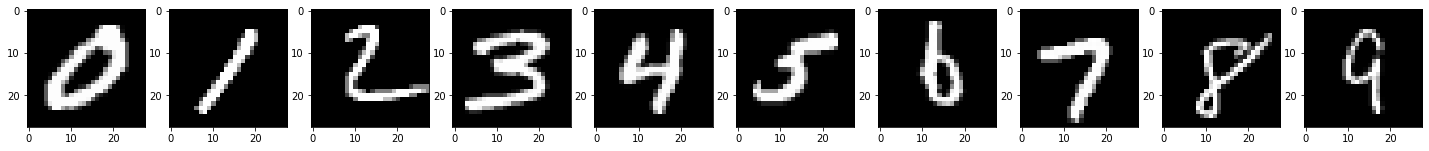

In [ ]:
# Для лучшего запоминания кода, напишем вывод примеров цифр по каждому классу

#Для начала создадим полотно из 10 графиков
fig, axs = plt.subplots(1,10, figsize=(25,3))

# Циклом проходим по всем классам
for i in range(10):
  label_indexes = np.where(y_train==i)[0]             # Получим список из индексов положений класса i в y_train   ???????[0]
  print (label_indexes)                               # Посмотрим на массив(для каждой отдельной цифре)         (к задаче не относится просто для наглядности)
  index = random.choice(label_indexes)                # Выбираем из списка индекс случайным образом
  print (index)                                       # Посомтрим какой номер из массива выбрала функция random (к задаче не относится просто для наглядности)
  img = x_train[index]                                # Из x_train выбираем это случанйое изображение

  axs[i].imshow(Image.fromarray(img), cmap='gray')    # Отображаем на графике

plt.show()


In [ ]:
#  Разделим обучающую выборку на (обучающую и проверочную). Чтобы не задействовать тестовую во время обучения
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.16666, shuffle=True)
# Посмотрим на размр выборок
print(y_train_new.shape)
print(y_val.shape)
print(y_test.shape)

(50000,)
(10000,)
(10000,)


In [ ]:
# Правильные ответы из переменных y_train и y_test превращаем в one_hot_encoding c помощью функции utils из библиотеки tensorflow.keras
y_train_new = utils.to_categorical(y_train_new,10)
y_val = utils.to_categorical(y_val,10)
y_test = utils.to_categorical(y_test,10)

# Проверим результат 
print(y_train_new.shape)
print(y_val.shape)
print(y_test.shape)

print(y_train_new[0])   # Это цифра 1
print(y_val[0])         # Это цифра 1
print(y_test[0])        # Это цифра 7

(50000, 10)
(10000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# Чтобы сверточная сеть понимала, что это черно-белые данные, меняем формат, добавляя размерность 1 (так как они работают только размерностью такого формата)
x_train_new = x_train_new.reshape(x_train_new.shape[0],28,28,1) 
# И аналогично
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_val = x_val.reshape(x_val.shape[0],28,28,1)

# Посмотрим на результат 
print(x_train_new.shape)
print(x_val.shape)
print(x_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


# Создание нейронной сети

In [ ]:
#Созадем модель сети
model = Sequential()

model.add(BatchNormalization(input_shape=(28,28,1)))               # Слой нормализации

model.add(Conv2D(32,(3,3), padding='same', activation='relu'))     # Первый сверточный слой

model.add(Conv2D(32,(3,3), padding='same', activation='relu'))     # Второй сверточный слой

model.add(MaxPooling2D(pool_size=(2,2)))                           # Первый слой подвыборки

model.add(Dropout(0.25))                                           # Слой регуляризации. От переобучения

model.add(Flatten())                                               # Вытягиваем значения с помощью слоя Flatten

model.add(Dense(256, activation='relu'))                           # Для классификации добавим полносвязный слой

model.add(Dropout(0.25))                                           # Еще один слой регуляризации. От переобученя

model.add(Dense(10, activation='softmax'))


# Теперь можно компилировать сеть
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Посмотрим на параметры созданной сети
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [ ]:
#Зададим значение batch_size
batch_size = 128


In [ ]:
# Теперь можно приступить у обучению сети.
history = model.fit(x_train_new, y_train_new, batch_size = batch_size, epochs=15, validation_data=(x_val,y_val), verbose=1 )

Epoch 1/15
391/391 [==============================] - 10s 8ms/step - loss: 0.3861 - accuracy: 0.8770 - val_loss: 0.0645 - val_accuracy: 0.9806
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 0.0573 - accuracy: 0.9832 - val_loss: 0.0402 - val_accuracy: 0.9874
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0346 - val_accuracy: 0.9883
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0346 - val_accuracy: 0.9895
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.0338 - val_accuracy: 0.9897
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0429 - val_accuracy: 0.9873
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0326 - val_accuracy: 0.9898
Epoch

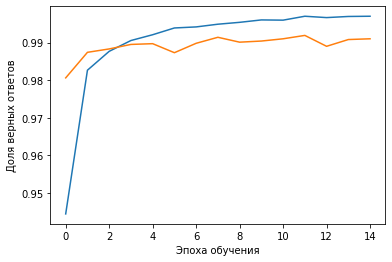

In [ ]:
# После обучения сети, можно посмотреть на графике этот процесс. 
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочной выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.show()

# Определение цифр из тестовой выборки

In [ ]:
# Рандомно выбираем номер примера из тестовой выборки 
n = np.random.randint(x_test.shape[0])     # n принимает значение от 0 и до размера тестовой выборки

# Получаем выход сети исходя из значения которое находится в переменной n.
prediction = model.predict(x_test)

# Выведим на эран полученный результат 
print ("Выход сети: ", prediction[n])                        # Массив под номером n
print ("Распознанная цифра: ", np.argmax(prediction[n]))     # Максимальное значение из массива
print ("Верный ответ:", np.argmax(y_test[n]))                # Выведет позиционный номер из массива, в котором есть одна единица, это и будет правильный ответ

Выход сети:  [6.0597767e-13 1.0000000e+00 1.3303048e-11 2.9987961e-12 3.2215570e-11
 6.7020350e-10 2.7674987e-12 1.0750624e-10 2.5013991e-09 2.7239253e-10]
Распознанная цифра:  1
Верный ответ: 1


Данная нейронная сеть распознает с 99% точностью все картинки представленные в тестовой выборке. 

# Распознование цифр на своих фотографиях

Взято 4 набора (от 0 до 9). Написанные разными людьми.

In [ ]:
# Создадим функцию для увеличения контрастности 
def change_contrast(img, factor):
  def contrast(pixel):
    return 128 + factor * (pixel - 128)
  return img.point(contrast)

# Создаем x_test для загруженных картинок и y_test для классов изображений
x_test_real = []
y_test_real = []

# Пройдемся циклом по всем классам от 0 до 9
for i in range(10):
  img_path = '1/'+str(i)+'.jpg'                               # Определяем имя каждого изображения
  img = image.load_img(img_path, grayscale=True, target_size=(28, 28))   # Загружаем изображение и изменяем его размер
  img_contrast = change_contrast(img, factor=5.0)                      # Увеличиваем контрастность изображения
  x_test_real.append(255 - np.asarray(img_contrast))                   # Инвертируем изображение и добавляем в выборку
  y_test_real.append(i)  

# Преобразуем оба созданных списка в numpy массив
x_test_real = np.array(x_test_real)
y_test_real = np.array(y_test_real)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


<function matplotlib.pyplot.show>

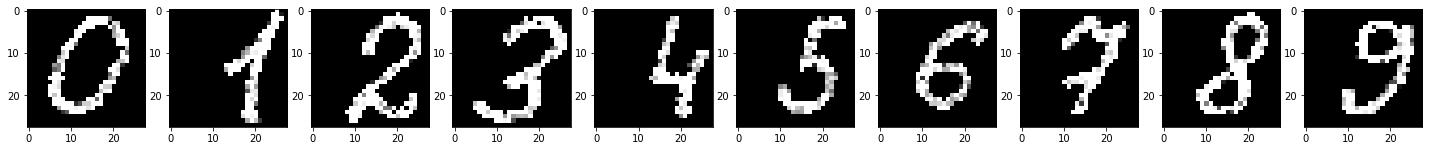

In [ ]:
# Посмотрим визуально какие картинки и какие цифры мы подаем на вход обученной нейронной сети

fig, axs = plt.subplots(1,10, figsize=(25,3))                      # Создадим полотно из 10 графиков (от 0 до 9)
for i in range(10):                                               # Проходим циклом по всем классам
  axs[i].imshow(Image.fromarray(x_test_real[i]), cmap='gray')     #Конвертируем изображение в черно-белый формат
plt.show

In [ ]:
# Меняем формат данных, как делали до этого
x_test_real = x_test_real.reshape(x_test_real.shape[0],28,28,1)

In [ ]:
# Теперь можно приступить к классификации всех изображений
prediction =model.predict(x_test_real)
for i in range(10):                             # Пройдемся циклом по всем изображениям
  print ("Распознанная цифра:", np.argmax(prediction[i]), "  Верный ответ: ", y_test_real[i])

Распознанная цифра: 0   Верный ответ:  0
Распознанная цифра: 7   Верный ответ:  1
Распознанная цифра: 2   Верный ответ:  2
Распознанная цифра: 3   Верный ответ:  3
Распознанная цифра: 4   Верный ответ:  4
Распознанная цифра: 5   Верный ответ:  5
Распознанная цифра: 6   Верный ответ:  6
Распознанная цифра: 2   Верный ответ:  7
Распознанная цифра: 8   Верный ответ:  8
Распознанная цифра: 8   Верный ответ:  9


**Как видно не все цифры распознались верно. Попробуем аналогичным способом распознать другие тестовые выборки.**

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Распознанная цифра: 2   Верный ответ:  0
Распознанная цифра: 7   Верный ответ:  1
Распознанная цифра: 3   Верный ответ:  2
Распознанная цифра: 3   Верный ответ:  3
Распознанная цифра: 4   Верный ответ:  4
Распознанная цифра: 5   Верный ответ:  5
Распознанная цифра: 6   Верный ответ:  6
Распознанная цифра: 4   Верный ответ:  7
Распознанная цифра: 8   Верный ответ:  8
Распознанная цифра: 3   Верный ответ:  9


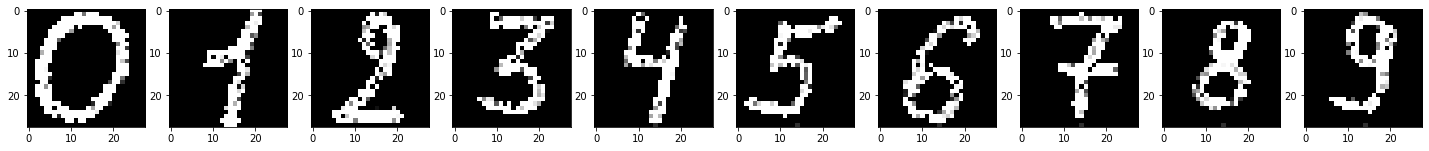

In [ ]:
x_test_real = []
y_test_real = []

for i in range(10):
  img_path = '2/'+str(i)+'.jpg'                               
  img = image.load_img(img_path, grayscale=True, target_size=(28, 28))   
  img_contrast = change_contrast(img, factor=10.0)                     
  x_test_real.append(255 - np.asarray(img_contrast))                   
  y_test_real.append(i)  

x_test_real = np.array(x_test_real)
y_test_real = np.array(y_test_real)

fig, axs = plt.subplots(1,10, figsize=(25,3))                      
for i in range(10):                                               
  axs[i].imshow(Image.fromarray(x_test_real[i]), cmap='gray')    
plt.show

x_test_real = x_test_real.reshape(x_test_real.shape[0],28,28,1)

prediction =model.predict(x_test_real)
for i in range(10):                             
  print ("Распознанная цифра:", np.argmax(prediction[i]), "  Верный ответ: ", y_test_real[i])

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Распознанная цифра: 0   Верный ответ:  0
Распознанная цифра: 1   Верный ответ:  1
Распознанная цифра: 2   Верный ответ:  2
Распознанная цифра: 3   Верный ответ:  3
Распознанная цифра: 4   Верный ответ:  4
Распознанная цифра: 5   Верный ответ:  5
Распознанная цифра: 6   Верный ответ:  6
Распознанная цифра: 3   Верный ответ:  7
Распознанная цифра: 8   Верный ответ:  8
Распознанная цифра: 9   Верный ответ:  9


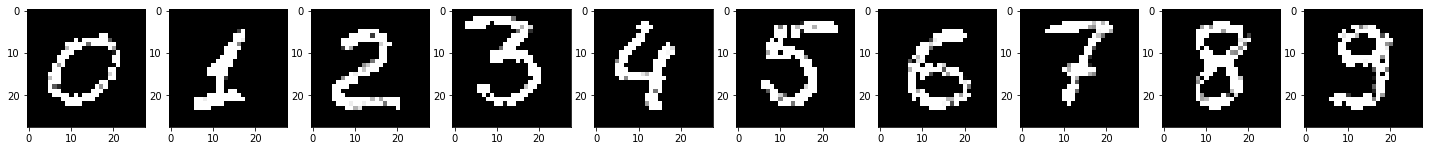

In [ ]:
x_test_real = []
y_test_real = []

for i in range(10):
  img_path = '3/'+str(i)+'.jpg'                               
  img = image.load_img(img_path, grayscale=True, target_size=(28, 28))   
  img_contrast = change_contrast(img, factor=10.0)                     
  x_test_real.append(255 - np.asarray(img_contrast))                   
  y_test_real.append(i)  

x_test_real = np.array(x_test_real)
y_test_real = np.array(y_test_real)

fig, axs = plt.subplots(1,10, figsize=(25,3))                      
for i in range(10):                                               
  axs[i].imshow(Image.fromarray(x_test_real[i]), cmap='gray')     
plt.show

x_test_real = x_test_real.reshape(x_test_real.shape[0],28,28,1)

prediction =model.predict(x_test_real)
for i in range(10):                             
  print ("Распознанная цифра:", np.argmax(prediction[i]), "  Верный ответ: ", y_test_real[i])

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Распознанная цифра: 0   Верный ответ:  0
Распознанная цифра: 4   Верный ответ:  1
Распознанная цифра: 2   Верный ответ:  2
Распознанная цифра: 3   Верный ответ:  3
Распознанная цифра: 4   Верный ответ:  4
Распознанная цифра: 5   Верный ответ:  5
Распознанная цифра: 6   Верный ответ:  6
Распознанная цифра: 2   Верный ответ:  7
Распознанная цифра: 8   Верный ответ:  8
Распознанная цифра: 3   Верный ответ:  9


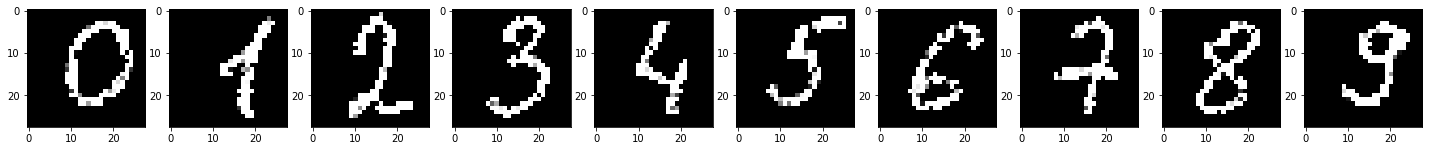

In [ ]:
x_test_real = []
y_test_real = []

for i in range(10):
  img_path = '4/'+str(i)+'.jpg'                               
  img = image.load_img(img_path, grayscale=True, target_size=(28, 28))   
  img_contrast = change_contrast(img, factor=15.0)                     
  x_test_real.append(255 - np.asarray(img_contrast))                   
  y_test_real.append(i)  

x_test_real = np.array(x_test_real)
y_test_real = np.array(y_test_real)

fig, axs = plt.subplots(1,10, figsize=(25,3))                      
for i in range(10):                                               
  axs[i].imshow(Image.fromarray(x_test_real[i]), cmap='gray')    
plt.show

x_test_real = x_test_real.reshape(x_test_real.shape[0],28,28,1)

prediction =model.predict(x_test_real)
for i in range(10):                             
  print ("Распознанная цифра:", np.argmax(prediction[i]), "  Верный ответ: ", y_test_real[i])

**Тот же самый тестовый набор без инверсии цвета**

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Распознанная цифра: 0   Верный ответ:  0
Распознанная цифра: 4   Верный ответ:  1
Распознанная цифра: 2   Верный ответ:  2
Распознанная цифра: 6   Верный ответ:  3
Распознанная цифра: 6   Верный ответ:  4
Распознанная цифра: 8   Верный ответ:  5
Распознанная цифра: 8   Верный ответ:  6
Распознанная цифра: 8   Верный ответ:  7
Распознанная цифра: 8   Верный ответ:  8
Распознанная цифра: 8   Верный ответ:  9


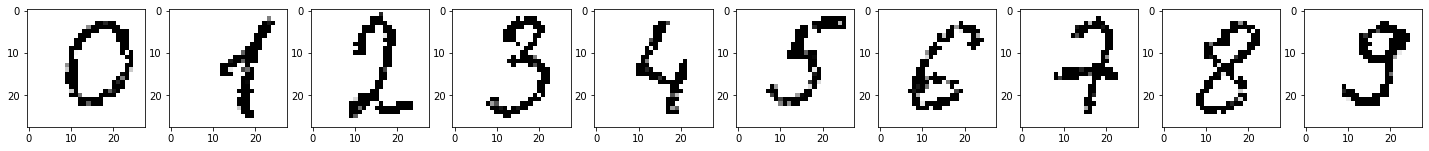

In [ ]:
x_test_real = []
y_test_real = []

for i in range(10):
  img_path = '4/'+str(i)+'.jpg'                               
  img = image.load_img(img_path, grayscale=True, target_size=(28, 28))   
  img_contrast = change_contrast(img, factor=15.0)                     
  x_test_real.append(np.asarray(img_contrast))                   
  y_test_real.append(i)  

x_test_real = np.array(x_test_real)
y_test_real = np.array(y_test_real)

fig, axs = plt.subplots(1,10, figsize=(25,3))                      
for i in range(10):                                               
  axs[i].imshow(Image.fromarray(x_test_real[i]), cmap='gray')    
plt.show

x_test_real = x_test_real.reshape(x_test_real.shape[0],28,28,1)

prediction =model.predict(x_test_real)
for i in range(10):                             
  print ("Распознанная цифра:", np.argmax(prediction[i]), "  Верный ответ: ", y_test_real[i])

**Без инверсии результат значительно хуже**

# Выводы:

- Не смотря на то, что на тестовой выборке были допущены ошибки, сеть работает
- Возможно это связано:
  - Со стилем написания цифр (сеть обучалась в другом стиле). И видно что одна и та же цифра написанная по разному, по разному и определяется.
  - Так как цифры были написаны синей пастой, то после увилечения контрастности видны черные пиксели внутри цифр. 
  - Для большей точности следует улучшить тестовые выборки
  
  - Попробовать добавить данные рукописные выборки в обучающеся. Возможно будет улучшение. Но данного кол-ва недостаточно, нужна база подобных изображений побольше. 

  - Изменить архитектуру нейронной сети. Но на данный момент точность и так уже 99%.

  - Для более точных предсказаний лучше применять инверсию цвета (белые буквы на черном фоне)

  - Данный код был написан вручную